# MNIST Classification

## Machine Learning Regression Algorithm Selection

*Eduardo Solano Jaime*

*0213663*

*ECID*

*Universidad Panamericana campus Guadalajara*

---

## Abstract 

This report presents a comprehensive study on the selection of an optimal machine learning classification algorithm for the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. The goal is to develop a robust model that accurately classifies handwritten digits. The process begins with data preparation and processing, followed by feature engineering to extract meaningful attributes from the images. Various machine learning models are then built and rigorously tested on these features. The performance of each model is evaluated using appropriate metrics. Finally, cross-validation techniques are employed to ensure the model’s generalizability and to determine the most effective classification method. The findings of this report contribute to the ongoing efforts in the field of image classification and provide valuable insights for future research.
The full code is available in my [github repository](https://github.com/).

## Methodology

1. **Goal Setting**: Define the objective of your project. In this case, it is to classify handwritten digits from the MNIST dataset.

2. **Data Preparation**: Load the MNIST dataset and split it into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.

3. **Data Processing**: This step can help improve the performance of many machine learning algorithms.

4. **Feature Engineering**: In the context of the MNIST dataset, each pixel in the image can be considered a feature.

5. **Model Building**: Train different machine learning models on the processed data.

6. **Model Testing**: Evaluate the performance of each model on the testing set.

7. **Cross-Validation**: Perform k-fold cross-validation and other methods to assess how well your model generalizes to unseen data.

8. **Model Selection**: Based on the cross-validation results, select the model that performs the best on the validation sets.

9. **Final Evaluation**: Finally, evaluate the performance of your selected model on the testing set.

## Dataset Exploration

The MNIST database of handwritten digits with 784 features. It is a subset of a larger set available from the National Institute of Standards and Technology. The digits have been size-normalized and centered in a fixed-size image. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='pandas')
X, y = mnist["data"], mnist["target"]

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [25]:
import numpy as np

print(f"Null values: {np.any(X.isnull())}")
print(f"Nan values: {np.any(X.isna())}")

Null values: False
Nan values: False


Therefore, the dataset is free of non-numeric and missing values.

### Features characteristics

It comprises 28x28 pixel grayscale images of handwritten digits (0 to 9). Each image is a matrix where each pixel's value represents the grayscale intensity. Therefore, each pixel correspond to a feature in the dataset plus its corresponging label.

- Image Pixels: Each image consists of 28x28, totaling 784 pixels, each containing a value denoting the intensity of the grayscale (ranging from 0 to 255).
- Label: The correct classfification of the sample (0-9).

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14864\2627836406.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


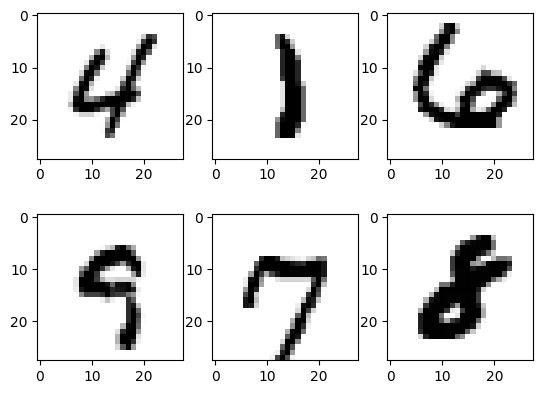

In [26]:
import matplotlib.pyplot as plt
from random import randint

def RandomDisplay(n):
    fig = plt.figure()
    for i in range(n):
        pixels = X.iloc[randint(0, 70000)].to_numpy().reshape((28, 28))
        fig.add_subplot(2, n//2, i+1)
        plt.imshow(pixels, cmap='binary')
    fig.show()
    
RandomDisplay(6)

Upon visualizing the data, it becomes apparent that the margins between the handwritten digits hold minimal relevance to the assigned labels. All the features with no standard variation are removed.

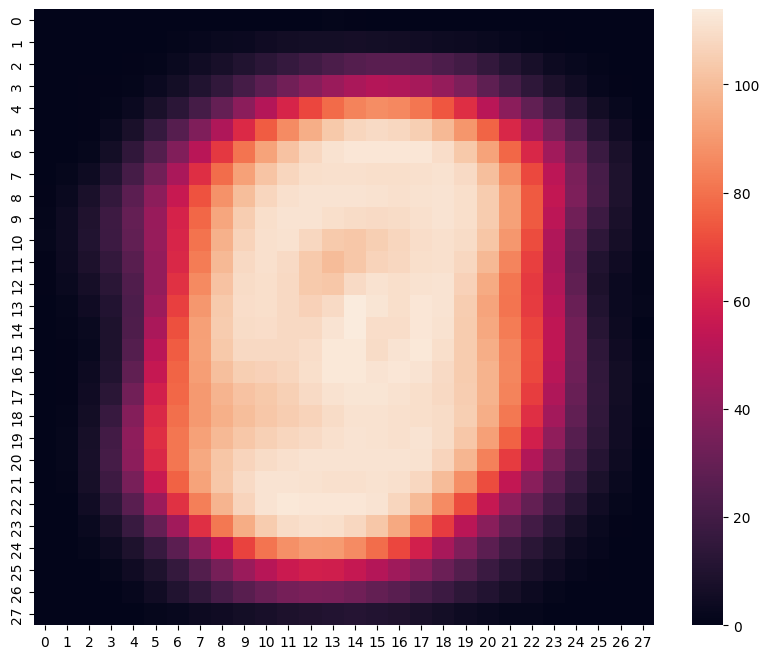

In [27]:
import seaborn as sea

stds = X.std().to_numpy()
fig = plt.figure(figsize=(10, 8))
ax = sea.heatmap(stds.reshape(28, 28))
plt.show()

### Correlated Features

In [28]:

corr = np.corrcoef(X, rowvar=False)
highly_correlated = np.where(np.abs(corr) > .75)
count = 0
for i, j in zip(highly_correlated[0], highly_correlated[1]):
    if i != j and i < j:
        count += 1
print(f"Adirect correlation between {count} features exists in the data")

Adirect correlation between 540 features exists in the data


c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Eduardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


## Data Processing

For further processing, despite the recomendation of using standarization for PCA (later on), normalization is the numeric transformer of choice. Normalization, unlike standardization, ensures that all features lie within a similar range, allowing for a consistent comparison of their relative importance. In scenarios where the distance between features matters more than their absolute values, normalization proves beneficial, just as in this case. 

In [29]:
from sklearn.preprocessing import Normalizer

X_fit = Normalizer().fit_transform(X)

## Data Transformation

Contrary to the conventional transformations given in class, and after the proper research, it was decided to use the Principal Component Analysis linear dimension reduction algorithm to greatly reduce the dataset's number of features and then a t-Distributed Stochastic Neighbor Embedding to better represent the datapoints in a 3-dimensional space.

The utilization of PCA and t-SNE is driven by their effectiveness in simplifying complex datasets. PCA aids in identifying and consolidating the most essential aspects of the data, simplifying its complexity. It essentially condenses information by highlighting the most critical patterns. On the other hand, t-SNE specializes in revealing relationships between closely positioned data points. It creates a visual representation that emphasizes the similarities between nearby points in the dataset.

By combining these techniques, a clearer understanding of the dataset is achieved. PCA streamlines and identifies the most important elements, while t-SNE visually represents how these elements relate, particularly focusing on similar items. Together, they facilitate a more comprehensive comprehension of the data, simplifying the complex information and making it more accessible for analysis and interpretation.

In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

if 'tsne_3.csv' in os.listdir(os.getcwd()):
    X_tsne = pd.read_csv('tsne_3.csv', index_col=False).iloc[:, 1:]
else:
    X_pca = PCA(n_components=50).fit_transform(X_fit)
    X_tsne = TSNE(n_components=3, n_jobs=-1).fit_transform(X_pca)
    tmp = pd.DataFrame(X_tsne, columns=['dim1', 'dim2', 'dim3'])
    tmp['label'] = y
    tmp.to_csv('tsne_3.csv')

In [48]:
X_tsne.head()

,dim1,dim2,dim3,label
0,-10.555911,2.885358,11.256718,5
1,-13.634624,26.119413,-3.348200,0
2,-29.136347,-18.721447,-3.543283,4
3,19.417025,-7.359248,-19.039770,1
4,-4.467030,-15.392969,-1.308921,9


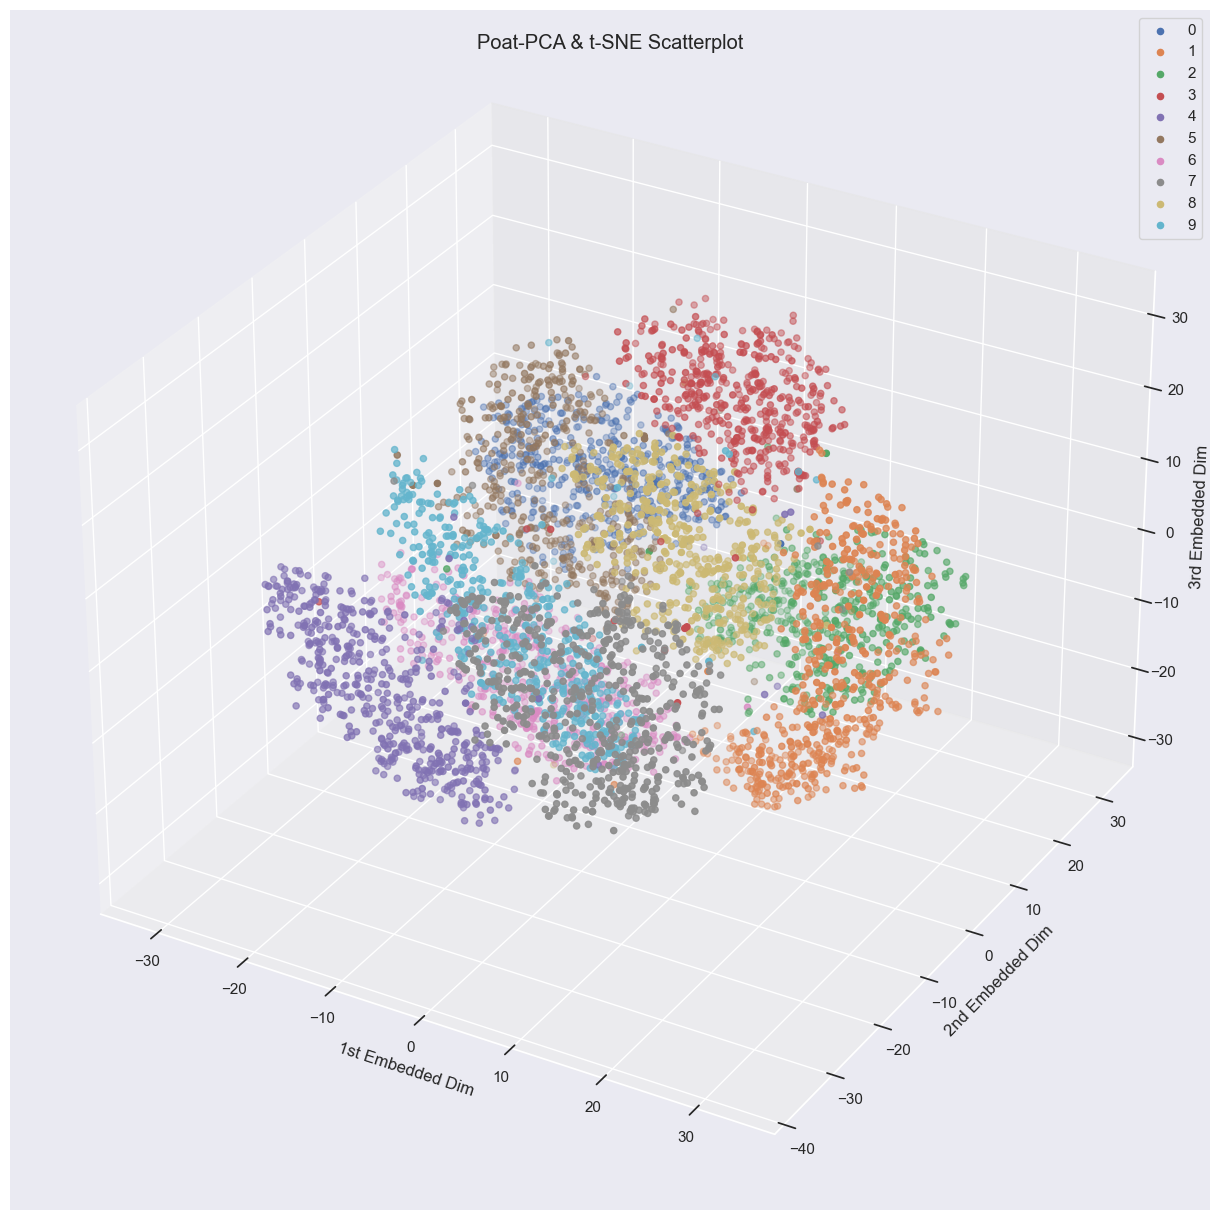

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

x = X_tsne[:5000]['dim1'].to_numpy()
y = X_tsne[:5000]['dim2'].to_numpy()
z = X_tsne[:5000]['dim3'].to_numpy()

fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

classes = X_tsne[:5000]['label']

ax.set_xlabel('1st Embedded Dim')
ax.set_ylabel('2nd Embedded Dim')
ax.set_zlabel('3rd Embedded Dim')

plt.suptitle('Poat-PCA & t-SNE Scatterplot')

for class_name in set(classes):
    indices = np.where(classes == class_name)
    ax.scatter(x[indices], y[indices], z[indices], label=class_name)

plt.legend()
plt.show()


Using PCA and t-SNE for feature selection and transformation might lead to a downside: the potential loss of the original meaning or interpretability of the features. As these methods focus on reducing dimensions and emphasizing relationships in the data, the direct connection to the original features might be obscured.